In [ ]:
#!/usr/bin/env python
# coding: utf-8


import numpy as np
import pandas as pd
import graphviz


# Feature set is stored in text files as CSV. Load the signal and 
# background datasets into Pandas data frames.
bkg_frame = pd.read_csv('pn.csv')
sig_1mev_frame = pd.read_csv('0.001.csv')
sig_10mev_frame = pd.read_csv('0.01.csv')
sig_100mev_frame = pd.read_csv('0.1.csv')
sig_1000mev_frame = pd.read_csv('1.csv')

print('Number of ECal PN events: %s' % len(bkg_frame.index))
print("Number of 1 MeV A' events: %s" % len(sig_1mev_frame.index))
print("Number of 10 MeV A' events: %s" % len(sig_10mev_frame.index))
print("Number of 100 MeV A' events: %s" % len(sig_100mev_frame.index))
print("Number of 1000 MeV A' events: %s" % len(sig_1000mev_frame.index))

sig_frame = pd.concat([ sig_1mev_frame[:371626],
                        sig_10mev_frame[:377407], 
                        sig_100mev_frame[:369574], 
                        sig_1000mev_frame[:374796] ], ignore_index=True)


bkg_frame = bkg_frame[:1500000]

print('Total number of bkg events used in training: %s' % len(bkg_frame.index))
print('Total number of signal events used in training: %s' % len(sig_frame.index))



# Create the labels used to identify an event as signal and background
# In this case, events are tagged as follows 
# - background = 0
# - signal = 1
y_bkg = np.zeros(len(bkg_frame.index))
y_sig = np.ones(len(sig_frame.index))


# Merge the signal and background frames and label arrays
x_frame = pd.concat([bkg_frame, sig_frame], axis=0, ignore_index=True)
y = np.concatenate((y_bkg, y_sig))
import xgboost as xgb

# Load the model from the pkl file
import pickle
model = pickle.load(open("/home/xinyi_xu/ldmx-sw-collaboration/LDMX-scripts/EcalVeto-3.0/bdt_test_0/bdt_test_0_weights.pkl", "rb"))
print("load success")


#shap value 
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_frame)
shap.initjs()


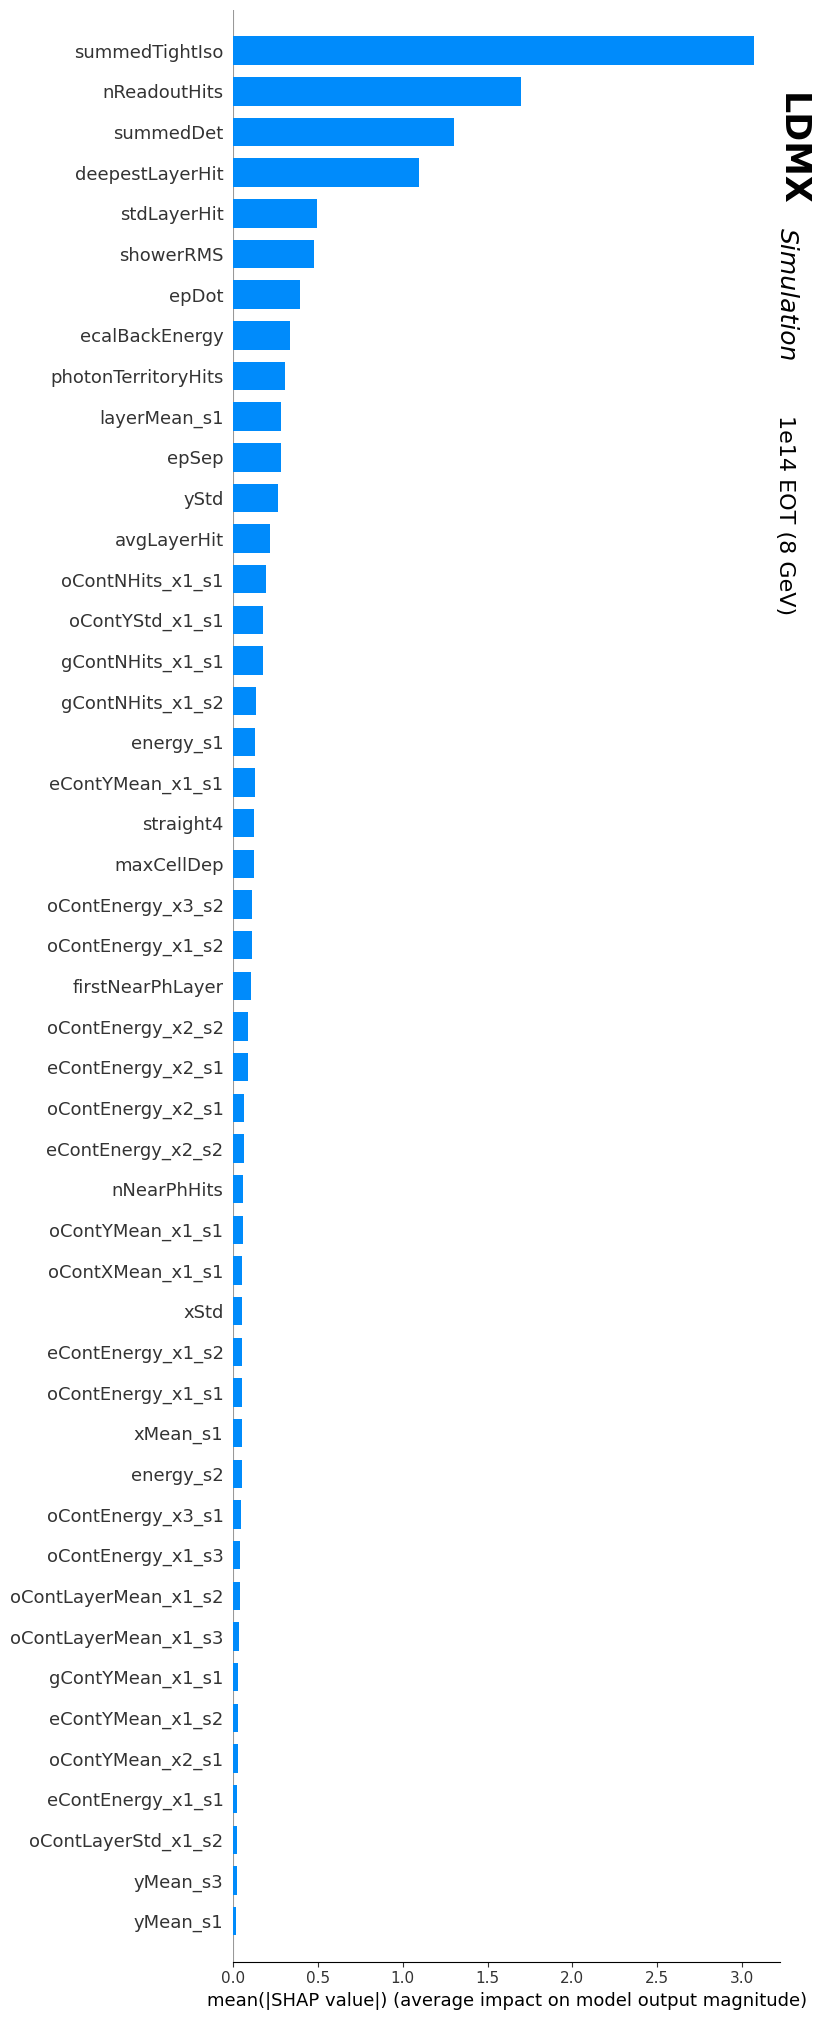

In [9]:
#abs shap plot w/ LDMX format
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, x_frame, plot_type="bar", max_display=49, show=False)
plt.text(0.99, 0.9, "LDMX", fontsize=25, fontweight='bold', transform=plt.gca().transAxes, ha='left', va='bottom', rotation=-90)
plt.text(0.99, 0.82, "Simulation", fontsize=18, fontstyle='italic', transform=plt.gca().transAxes, ha='left', va='bottom', rotation=-90)
plt.text(0.99, 0.69, "1e14 EOT (8 GeV)", fontsize=16, transform=plt.gca().transAxes, ha='left', va='bottom', rotation=-90)
plt.show()
